<a href="https://colab.research.google.com/github/Jo-chana/CoLab_ML_codes/blob/master/Avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

In [0]:
import matplotlib as mpl

mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

In [0]:
import pandas as pd

url = 'drive/My Drive/datasets/avocado.csv'
avocado_prices = pd.read_csv(url)

In [3]:
import numpy as np
np.shape(avocado_prices)

(18249, 14)

In [0]:
avocado = np.array(avocado_prices)

In [5]:
avocado_prices.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [0]:
average_price = avocado[:,2:3]
avocado_numdata = avocado[:,3:11]
avocado_region = avocado[:,13:14]
avocado_volume = avocado[:,3:4]
avocado_4046 = avocado[:,4:5]
avocado_4225 = avocado[:,5:6]
avocado_4770 = avocado[:,6:7]

avocado_year = avocado[:,12:13]
avocado_type = avocado[:,11:12]

In [0]:
import matplotlib.pyplot as plt

plt.scatter(avocado_volume, average_price,marker='s',c='g')
plt.xlabel('Volume')
plt.ylabel('Price')

#범례 표시
plt.legend()
plt.grid(True)
plt.show()

In [0]:
def scatter_graph(x,y):
  plt.scatter(x,y,marker='s',c='b')
  plt.xlabel('X data')
  plt.ylabel('Y data')
  plt.legend()
  plt.grid(True)
  plt.show()

def linear_graph(x,y):
  plt.plot(x,y)
  plt.xlabel('X data')
  plt.ylabel('Y data')
  plt.legend()
  plt.grid(False)
  plt.show()

In [0]:
from pandas.plotting import scatter_matrix


attributes = ['AveragePrice','Total Volume','4046','4225','4770']
#scatter_matrix(avocado_prices[attributes], figsize=(12,8))

In [0]:
#scatter_graph(avocado_prices['Total Volume'],avocado_prices['AveragePrice'])

In [0]:
transform = MinMaxScaler()
avocado_numdata_trans = transform.fit_transform(avocado_numdata)
#y_transform = transform.transform(average_price)
X_train,X_test,y_train,y_test = train_test_split(avocado_numdata_trans,average_price,test_size=0.2)

In [0]:
network = models.Sequential()
network.add(layers.Dense(128,activation='relu'))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer='rmsprop',
                loss='mean_squared_error',)               

network.fit(X_train,y_train,epochs=20,batch_size=128)
network.evaluate(X_test,y_test)

In [0]:
def compare_graph(X_test,y_test):
  y_pred = network.predict(X_test).flatten()
  real = []
  pred = []
  index = []
  for i in range(50):
    index.append(i)
    real.append(y_test[i])
    pred.append(y_pred[i])
  plt.figure(figsize=(10,5))
  plt.plot(index,real,'b-',label='Real Price')
  plt.plot(index,pred,'r--',label='Pred price')
  plt.legend(loc='center left',fontsize=12)
  plt.show()

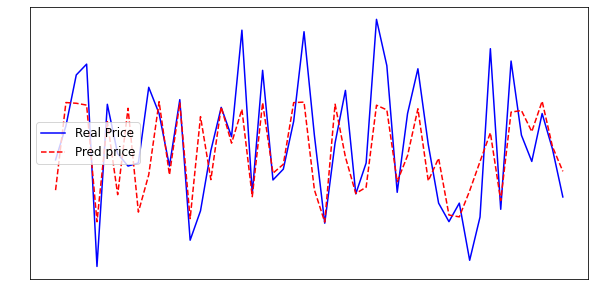

In [47]:
compare_graph(X_test,y_test) 